<div style="background-color:lightblue">
<h1><center>
    The Data Science Labs on <br/>
     Differential and Integral Calculus  <br/>
   <small>by Alden Bradford and Mireille Boutin </small>
</center></h1>
    </div>

<h1><center>
    Laboratory 2 - Part 1<br/>
    Introduction to error analysis - Determining Heart Rate from Photoplethysmography Sensors<br/>
    <p style="font-size: 16px"> Last Updated on January 7, 2022</p>
</center></h1>

<h2 style="color:orange;"><left>00. Content </left></h2>

## Mathematics ##
- additive error model; bias in error
- noise removal by averaging
- finding local maxima as "peaks"
- choosing a sampling rate based on distance between local maxima
- Local maxima defined as location between function increase and decrease
- Thresholding
- Computing beats per minutes (BMP) from peaktimes
  
    
## Programming Skills ##
- Best practice: use separate data file and analysis file
- Use/modify given Python data acquisition code
- Save data in text file
- Load data from text file
- Look at loaded data
- Plotting data
- Changing x-axis in a plot
- Array building
- zooming into plot
- Use of averaging code
- Use of local maxima identify code
- NaN
- Use of thresholding code
- Write code to compute beats per minutes (BMP) from peaktimes


## Embedded Systems ##
- Thonny and Micropython
- Installing Micropython on Pico


<h2 style="color:orange;"><left>0. Required Hardware </left></h2> 

- microcontroller: Raspberry Pi Pico
- pulse sensor
- breadboard
- USB connector

<h3 style="background-color:lightblue"><left> Write your name and email below: </left></h3>

First Name, Last Name, email 

<h2 style="color:orange;"><left>1. Introduction to error analysis </left></h2>


> In order to improve, we must first recognize that we are not perfect.

Today we will begin using numbers collected from the real world. Every number you measure is subject to several kinds of error from different sources. This is the first and most important lesson of error analysis: *every measurement has error. The goal is not to eliminate error, but rather to reduce it to an acceptable level.* As we progress through the semester, we will develop strong tools for analyzing and reducing error in our measurements, based off of differential calculus and Taylor series. Before we can do that, we need to establish some common language and techniques for describing errors.

## Types of error

An error is anything which can make it so that the number you get is different from the actual value of the quantity you are measuring. Here are a few sources of error you are likely to encounter:

 - measurement error. This is what most people think of when they hear about an error in measurement. This includes everything which could go wrong with your measurement instrument. Perhaps the marks on a ruler are not placed exactly evenly, or it isn't being held straight. Perhaps the paralax on a measurement dial leads to misalignment between the needle and the dial. Perhaps your tool is low on batteries and is malfunctioning. 
 - roundoff error. Also called truncation error. This is where a number is off a little bit because it was rounded. For example, Alden's favorite pocket calculator the TI-30Xa only keeps 14 digits of $\pi$. If you needed $\pi$ to any further precision, you would have to use a different calculator. Usually the cure for this source of error is fairly simple -- just keep more digits! However, this is not always practical: maybe you are using numbers someone else has rounded and cannot access the original data, or maybe keeping enough digits for your task would be too cumbersome. We will see some examples in a few weeks, when we study numerical differentiation, where roundoff error becomes really important.
 - modeling error. Every computation is based on a model, and every model is inaccurate. For example, suppose you want to measure the volume of the earth. You could perform astronomical measurements to figure out the radius of the earth, and use the volume formula for a sphere, $\frac{4}{3} \pi r^3$ to figure out the volume. The formula is perfect, without error, provided you are talking about a true sphere. As anyone knows, however, the earth is not a perfect sphere (it has mountains, for one thing). Therefore, there is some error associated with modeling the earth as a perfect sphere, which will affect your final volume computation.
 - definitional error. This is perhaps the most frequently overlooked source of error, and its definition gets a bit philosophical. Usually we can't get to a level where it is important in the physical sciences, though it is frequently important in the social sciences. As an example, consider the old unit of length, the barleycorn. This is still used today to measure shoe sizes. Its definition could not be simpler: it's the length of a grain of barley, roughly 1/3 of an inch or 8.5 millimeters. There is a problem here though: barley has some natural variablility of size, from 6.4 millimeters at the smallest to 13 millimeters at the longest [(see this study if you want to know more about barley)](https://www.agriculturejournals.cz/publicFiles/10118.pdf). So, depending on which type of barley you are using, your shoe could wind up being a bad fit. It's not a matter of the barley being a bad tool for measuring length in barleycorns: you can always tell exactly how long something is in barleycorns by lining up a row of barley, and you will be correct by definition. It's a problem with the definition of the length unit -- the definition has some error built in. This usually doesn't affect us when making distance measurements, since we have better definitions now for length, based off the speed of light and our definition of time. However, for very sensitive measurements, it is still sometimes an issue. Furthermore, for more abstractly defined quantities (such as intelligence, or anxiety, or pain) the definition still has a significant amount of error built in which can sometimes be the biggest source of error in a computation.

This is a relatively simple taxonomy of errors, but it encompasses most of the important sources of error you are likely to encounter. If you can think of a source of error which does not fit this taxonomy, we would like to hear about it (email mboutin at purdue dot you know what). As we will see, you could waste a lot of effort reducing the error from one source only to find that a different source is introducing way more error, making your efforts fruitless. Therefore, it is important to be aware of how each source of error could creep in.



<h3 style="color:red;"><left> Exercise 1 </left></h3>

For each source of error listed, classify it according to the taxonomy above. Explain why it fits into the category you chose.

1. You have a thermometer in your garden which you use to tell the temperature in the morning. The sun shines directly on the thermometer, making it read a temperature higher than the air temperature.

2. You use a tire pressure gauge to figure out the pressure in your car tires. It only has a marking every 2 PSI, so you do your best to estimate the value to the nearest PSI.

3. You use a GPS system to track how long your commute is, but it only takes into account longitude and latitude, not elevation.

<h3 style="background-color:lightblue"><left> Write Answers Below </left></h3>

1. Measurement error because it is an error that occurs with how the instrument reads the temperature 
2. Roundoff error because while it is a poor design, the error lies with estimating to the nearest PSI rather than changing instruments
3. Measurement error because it is an error that occurs due to how the instrument is designed

## Two ways errors behave

We usually represent error with a variable either as $e$ (short for error), or in Greek with the lower case letter epsilon which makes the same sound, written as either $\epsilon$ or $\varepsilon$. This lets us represent how any measured quantity $x$ is related to its "true value" $t$:
$$
x = t + \varepsilon.
$$
This is sometimes called *the most famous equation of measurement theory*.

### Random error

Our goal is usually to make the total error small. For some types of error, $\varepsilon$ is on average zero; the error is just as often positive as it is negative. A consequence of this is that if you took lots and lots of measurements (say $x_1=t+\varepsilon_1$, $x_2=t+\varepsilon_2$, $\dots$, $x_k=t+\varepsilon_k$) then you could take the average 
$$
\frac{x_1+x_2+\dots+x_k}{k} = t + \frac{\varepsilon_1+\varepsilon_2+\dots+\varepsilon_k}{k}
$$
and the term $\frac{\varepsilon_1+\varepsilon_2+\dots+\varepsilon_k}{k}$ would tend to be much smaller than each $\varepsilon_i$ on its own, since the positive and negative terms would mostly cancel each other out. This is really useful, since it gives us a way of reducing the total error, getting a better estimate of the value $t$. If this is the case, we say that the error in $x$ is *random*. This technique for reducing random error [was invented in the 1700s.](https://www.math.purdue.edu/~bradfoa/misc_files/arithmetic_mean.pdf) (See  for example page 121 of "Studies in the History of Statistics and Probability," by M.G. Kendall, 1960.)

### Systematic error

Unfortunately, we are often not so lucky as to only have random error. Very often there is some bias in our measurement which causes it to be usually positive or usually negative, so it does not help much to use the repeated measurement procedure described above. In this case we say there is a *systematic* error.

For example, let's say you decide to save some computer cycles in a computation by truncating your numbers -- instead of rounding (which could take some additional time, depending on how your computer is set up) you decide to just drop the least significant digits. The effect of this is that you will always be making the number smaller. It's just like if you always decided to round down. In the terms outlined above, $\varepsilon$ is always negative in this case.

As another example, suppose you are weighing precise amounts of material in a chemistry lab on a sensitive scale, but you don't have a cover over the scale and there is a slight downdraft at the work bench. You are leaning over the scale when you hit the tare button, shielding the scale from the air current. The air would push down on the scale a bit during the weighting, causing your estimated weight $x$ to usually be a little bit bigger than $t$. It would still vary randomly, but since $\varepsilon$ would usually be positive we would say that this is a systematic error in the positive direction.

<h3 style="color:red;"><left> Exercise 2 </left></h3>

For each source of error described, classify it as a random or a systematic error. If it is a systematic error, say whether it is in the positive or negative direction. Justify your answers with a brief sentence or two.

1. You are measuring your height against a wall by placing a book on your head and seeing where the book touches the wall, measuring the length along the wall from the floor with a tape measure. Unfortunately, you cannot guarantee that the book is completely level.

2. You make sure the book from problem 1 is level by placing one edge vertically along the wall. Unfortunately, the wall is very slightly sloped toward you.

3. You have a thermometer in your garden which you use to tell the temperature in the morning. The sun shines directly on the thermometer.

4. You use a tire pressure gauge to figure out the pressure in your car tires. It only has a marking every 2 PSI, so you do your best to estimate the value to the nearest PSI.

5. You use a GPS system to track how long your commute is, but it only takes into account longitude and lattitude, not elevation. 

<h3 style="background-color:lightblue"><left> Write Answers Below </left></h3>

1. This source of error is random error because the leveling of the book would change every time and may sometimes be level, meaning that the positive and negative of epsilon would about even each other out.
2. This source of error is systematic error because the book will consistently not be level in the same direction, causing epsilon to never balance out.
3. This source of error is systematic error because the sun will always shine directly on the thermometer if it stays in the same spot, which means epsilon will never balance out.
4. This source of error is random error because eye-balling the pressure will cause it to be occasionally too much and occasionally too little, meaning that epsilon will mostly balance out.
5. This source of error is systematic error because the GPS system will always overlook elevation, meaning the reading will always be less than it should be causing epsilon to never balance out.

<h2 style="color:orange;"><left>2. Data Acquisition </left></h2>

You will collect data today using the [Pulse Sensor](https://pulsesensor.com/pages/about-us), which shines a bright light on your skin and measures how much comes back to get a number which is proportional to your blood pressure. After we have collected the data, we will analyze it using NumPy and Matplotlib. First, though, we have to get those numbers onto your computer.

We will be acquiring the data using a microcontroller. A microcontroller is a very small general purpose computer good at communicating with electronic sensors. The specific microcontroller we will use is called the Raspberry Pi Pico. Conveniently, it runs Python code. Have a look at the script `main.py`. It does a very simple thing: it listens for a message containing a sample rate and a number of samples. Then, with the frequency given in the message, it measures the voltage on a specific pin and sends a message with that measurement. It does this the specified number of times, and then sends the message `"done"`.



<h3 style="color:red;"><left> Exercise 3 </left></h3>

Before moving on, we should decide on a sampling frequency -- that is, how often do you want to know your approximate blood pressure? As we saw in Lab 1, it would be easy to get the wrong impression from an oscillating signal if you don't sample frequently enough. Considering the range of possible heart rates for adults, how would you choose the sampling rate?  Write your choice below, along with your reasoning for choosing that sampling rate.

<h3 style="background-color:lightblue"><left> Write Answer Below </left></h3>

NOTE: Include a link regarding the possible heart rates for adults or tell the students to look it up?

Since the range of possible heart rates for adults is 60 to 100 beats per minute, the sampling rate should be approximately twice a second, since this would allow for finding one beat per minute or two beats per minute, accounting for 60 to 120 beats per minute.

------------------------------------------------------
Time it took to complete up to this point: 26 minutes.



## Loading firmware onto the microcontroller

Open up Thonny. [Follow the directions here](https://projects.raspberrypi.org/en/projects/getting-started-with-the-pico/3) to install the Micropython firmware on the Pico. The following page at that link has directions for testing to make sure it's working.

Use Thonny's file manager to transfer `main.py` to the Pico. Now, whenever you plug in the pico, it will run `main.py`.

## Wiring it up

We have the computer talking to the microcontroller, now we just need the Pulse Sensor talking to the microcontroller. To do this, we will use a "bread board". The name "bread board" comes from the old days of electronics when people would prototype their projects by nailing them to a cutting board. With a modern bread board, you don't need nails.

There are three wires on the Pulse Sensor, and three connections we have to make. We will use tiny metal clips which are sitting inside the bread board. The clips are arranged in rows -- see the example your instructor has taken apart. 

By inserting the entire Pico into your bread board, we can easily connect electrical wires to each of the pins of the Pico. First, **disconnect the Pico from your computer** and plug it into the bread board so that the USB plug is at the end of the bread board.

Next, inspect the data sheet for the Pico (this is provided, and is also available on the internet). Specifically, look for figure 2 on page 4. Look for the pin labeled "3V3(OUT)". Connect this to the wire labeled with a "+" on the Pulse Sensor. Connect the wire labeled "-" to the pin labeled "AGND". Connect the pin labeled "ADC0" to the other wire, which is labeled "S". Finally, connect a ceramic capacitor between "AGND" and "ADC0".

<p align="center">
    <img src="pico_on_breadboard.JPG" width="300"/>
    <img src="hr_sensor_labels.JPG" width="267"/>
    <img src="hr_sensor_pad.JPG" width="335"/>
<p/>

**At this point, check with your instructor to make sure you have it configured correctly.** If it is wired incorrectly, there is a chance that powering it on could damage either the Pico or the Pulse Sensor.

Once you have checked with your instructor, you can plug the Pico into your computer and move on to the next step.

<p align="center">
    <img src="connected_hr_sensor.JPG" width="500"/>
<p/>

## Acquiring data

Now we are ready to acquire the data! Open Thonny and run `main.py`. then, from the `run` menu in Thonny, select `disconnect`. This will allow our program here to pick up the connection, putting the data directly into a plot.

Run the following cell. That will create an empty plot which we will fill in using another cell below. Notice that the sampling rate is not specified -- you have to fill it in.

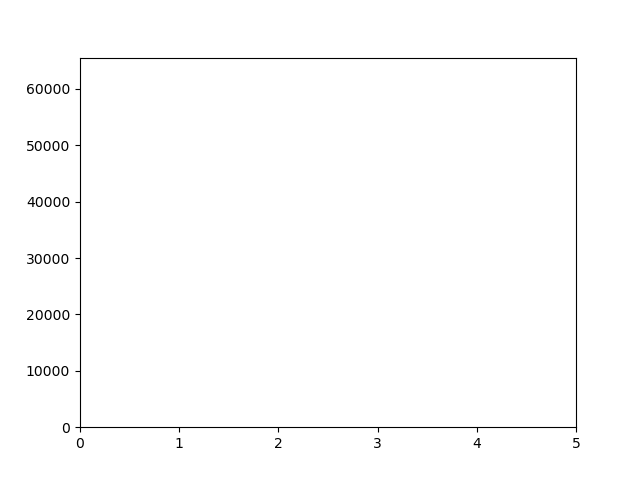

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from heartbeat import acquire
%matplotlib widget

sampling_rate = # You must fill this in!
sampling_duration = 5 # seconds
number_of_samples = sampling_rate * sampling_duration

x = np.arange(number_of_samples)/sampling_rate
y = np.full_like(x, np.nan)

fig, ax = plt.subplots()
line,  = plt.plot(x, y)
plt.xlim(0, sampling_duration)
plt.ylim(0, 2**16)
plt.show()

Now, touch the pad of your finger to the side of the heart monitor with a picture of a heart on it.
Your finger should be barely touching it -- don't apply pressure. Once you have it situated correctly, run the following cell to acquire data. This cell has a `while True` loop in it, which will just run forever unless we do something to stop it. Once you have found your pulse, hit the "stop" button at the top of the page to leave the loop. What it shows will be stored.

In [7]:
try:
    while True:
        acquire(rate = sampling_rate, y = y, line = line, fig = fig)
except KeyboardInterrupt:
    print('done acquiring!')

Exception: No Raspberry Pi Pico was detected. Check to make sure it is plugged in, and that no other programs are accessing it

Re-run the above cell as many times as you need to get a good, clean measurement which shows a clear heartbeat pattern. On me, it looks something like this:

<img src="example_heartbeat.png"/>

Once you have a good measurement, run the following cell to save your measurement to a file.

In [ ]:
np.savetxt('heartbeat.txt', y)

Have a look at the file you just made (you should be able to open it right here in Jupyterlab). You should see a long list of numbers.

It is a very good practice to use a separate document to store your data. By not storing your data within the document you use to analyze it, you will be able to run your analysis several times without fear of changing your original data. For this reason, the rest of this lab continues in a separate jupyter notebook, called Part 2.